In [1]:
import numpy as np
import pandas as pd
from matplotlib import figure
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
df= pd.read_csv('letter-recognition.data', header=None)
print(df.shape)
df.head()

(20000, 17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       20000 non-null  object
 1   1       20000 non-null  int64 
 2   2       20000 non-null  int64 
 3   3       20000 non-null  int64 
 4   4       20000 non-null  int64 
 5   5       20000 non-null  int64 
 6   6       20000 non-null  int64 
 7   7       20000 non-null  int64 
 8   8       20000 non-null  int64 
 9   9       20000 non-null  int64 
 10  10      20000 non-null  int64 
 11  11      20000 non-null  int64 
 12  12      20000 non-null  int64 
 13  13      20000 non-null  int64 
 14  14      20000 non-null  int64 
 15  15      20000 non-null  int64 
 16  16      20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [5]:
# label encoding the class labels
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
df[0]= label_encoder.fit_transform(df[0])
print(df[0].unique())
df.head()

[19  8  3 13  6 18  1  0  9 12 23 14 17  5  2  7 22 11 15  4 21 24 16 20
 10 25]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [6]:
df_test= df[[0]]
print(df_test.shape)
df_test.head()

(20000, 1)


,0
0,19
1,8
2,3
3,13
4,6


In [7]:
df_train= df.drop(0, axis=1, inplace=False)
print(df_train.shape)
df_train.head()

(20000, 16)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_rem, y_train, y_rem = train_test_split(df_train, df_test, train_size=0.8)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print("x_train dataset size: ",X_train.shape)
print("y_train dataset size: ",y_train.shape)
print("x_validation dataset size: ",X_valid.shape)
print("y_validation dataset size: ",y_valid.shape)
print("x_test dataset size: ",X_test.shape)
print("y_test dataset size: ",y_test.shape)

x_train dataset size:  (16000, 16)
y_train dataset size:  (16000, 1)
x_validation dataset size:  (2000, 16)
y_validation dataset size:  (2000, 1)
x_test dataset size:  (2000, 16)
y_test dataset size:  (2000, 1)


In [10]:
print("number of unique classes in the dataset is- ", len(df[0].unique()))

number of unique classes in the dataset is-  26


In [11]:
df[0].value_counts()

20    813
3     805
15    803
19    796
12    792
0     789
23    787
24    786
13    783
16    783
5     775
6     773
4     768
1     766
21    764
11    761
17    758
8     755
14    753
22    752
18    748
9     747
10    739
2     736
7     734
25    734
Name: 0, dtype: int64

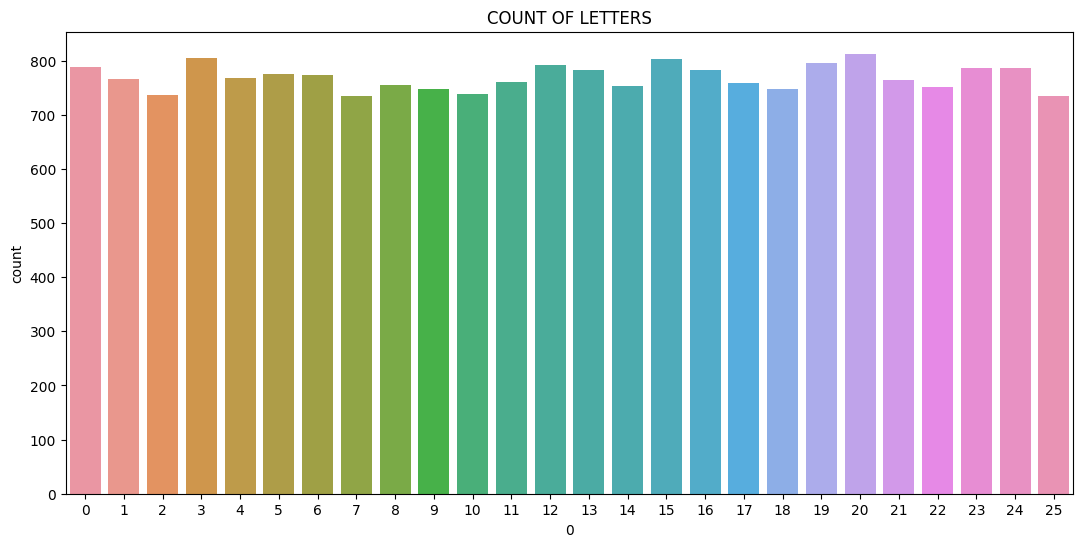

In [12]:
plt.figure(figsize = (13,6))
plt.title("COUNT OF LETTERS")
sns.countplot(x=0, data= df)
plt.show()

In [13]:
# we can observe that the datset is balanced and dont have any null values so we proceed with ot 

# Building the NN

In [14]:
# it has 2 layers i.e. 1 input, 1 hidden and 1 output layer
# lets assume 
# 40 neurons in the first hidden layer
# output layer is a 26 class softmax layer for multiclass classification

In [15]:
# converting all the datasets into arrays
x_train_arr = np.array(X_train)
y_train_arr = np.array(y_train)
x_test_arr = np.array(X_test)
y_test_arr = np.array(y_test)
x_valid_arr = np.array(X_valid)
y_valid_arr = np.array(y_valid)

In [16]:
onehot= OneHotEncoder()

In [17]:
y_train_arr = onehot.fit_transform(y_train_arr.reshape(-1,1))
y_train_arr = y_train_arr.toarray()
y_train_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
y_test_arr = onehot.fit_transform(y_test_arr.reshape(-1,1))
y_test_arr = y_test_arr.toarray()
y_train_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
y_valid_arr = onehot.fit_transform(y_valid_arr.reshape(-1,1))
y_valid_arr = y_valid_arr.toarray()
y_valid_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
class activation_function:
    def __init__(self):
        self.name = None
        self.output = None
        
    def tanh(self, input_data):
        return np.tanh(input_data)
    
    def grad_tanh(self, input_data):
        return 1-np.tanh(input_data)**2
    
    def relu(self, x):
        self.output = np.maximum(0,x)
        return self.output
    
    def grad_relu(self, x):
        self.output[self.output>0] = 1
        return self.output
    
    def activation(self, name, x):
        self.name = name
        if self.name == "relu":
            return self.relu(x)
        elif self.name == "tanh":
            return self.tanh(x)
        
    def grad_activation(self,x):
        if self.name == "relu":
            return self.grad_relu(x)
        elif self.name == "tanh":
            return self.grad_tanh(x)

In [21]:
# defining all three activation functions

def activation_relu(x):
    return np.maximum(0,x)
    
def activation_tanh(x):
    return np.tanh(x)

# def activation_softmax(x):
#     exp_values= np.exp(x - np.max(x, axis=1, keepdims=True))
#     probabilities= exp_values/ np.sum(exp_values, axis= 1, keepdims=True)
#     return probabilities

In [22]:
#defining the gradients of both the activation functions for updating the weights

def gradient_relu(x):
    x[x>0]=1
    return x

def gradient_tanh(x):
    return (1- np.tanh(x)**2)

# def gradient_softmax(x):
#     jacobian= np.diag(x)
#     for i in range(len(jacobian)):
#         for j in range(len(jacobian)):
#             if i == j:
#                 jacobian[i][j] = x[i] * (1-x[i])
#             else: 
#                 jacobian[i][j] = -x[i]*x[j]
#     return jacobian

In [23]:
# #defining the adam optimizer for faster convergence

# def optimizer_adam(weight, alpha=0.001, beta1= 0.9, beta2= 0.999, epsilon= 1e-8):
#     t=0
    
#     m_t=0
#     v_t=0
    
#     m_t_hat= m_t
#     v_t_hat= v_t
    
#     num_steps=1000
    
#     while t in range(1,num_steps):
#         dw= compute_gradient(weight)
        
#         m_t= beta1*m_t+ (1-beta1)*dw
#         v_t= beta2*v_t+ (1-beta2)*dw*dw
        
#         m_t_hat= m_t/(1- beta1**t)
#         v_t_hat= v_t/(1-beta2**t)
        
#         weight= weight- alpha*(m_t_hat/(v_t_hat.sqrt()+ epsilon))
    
#     return weight    

In [24]:
#defining a layer

class layer:
    def __init__(self):
        self.input = None
        self.output = None

    # computes the output Y of a layer for a given input X
    def forward_propagation(self, input):
        pass

    # computes dE/dX for a given dE/dY (and update parameters if any)
    def backward_propagation(self, output_error, learning_rate):
        pass

In [25]:
# the fully connected layer

class fully_connected_layer:
    def __init__(self, input_size, output_size):
        # xavier weight initialization
        # input_size = fan_in
        # output_size = fan_out
        self.weights = np.random.randn(input_size, output_size) / np.sqrt(input_size)
        self.bias = np.random.randn(1,output_size)

    # returns output for a given input
    def forward_propagation(self, input_data):
        self.input = input_data.reshape(1,-1)
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    # computes dE/dW, dE/dB for a given output_error=dE/dY. Returns input_error=dE/dX.
    def backward_propagation(self, output_gradient, learning_rate, optimizer, T):
        input_gradient = np.dot(output_gradient, self.weights.T)
        weights_gradient = np.dot(self.input.T, output_gradient)
        bias_gradient = output_gradient

        # updating the parameters
        self.weights = self.weights - (learning_rate * weights_gradient)
        self.bias = self.bias - (learning_rate * output_gradient)
        
        if optimizer=='adam':
            opt = AdamOptim(eta=learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-8)
            self.weights, self.bias = opt.update(t=T, w = self.weights, b = self.bias, dw = weights_gradient, db = output_gradient)
        
        return input_gradient

In [26]:
# # the actiation layer

# class activation_layer:
#     def __init__(self, activation, grad_activation):
#         self.activation = activation
#         self.grad_activation = grad_activation

#     # returns the activated input
#     def forward_propagation(self, input_data):
#         self.input = input_data
#         self.output = self.activation(self.input)
#         return self.output

#     # Returns input_error=dE/dX for a given output_error=dE/dY.
#     # learning_rate is not used because there is no "learnable" parameters.
#     def backward_propagation(self, output_gradient, learning_rate, optimizer, T):
#         return self.grad_activation(self.input) * output_gradient

In [27]:
# the activation layer

class activation_layer:
    def __init__(self, act_func):
        self.input = None
        self.output = None
        self.act_func = act_func
        self.act = activation_function()
        
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.act.activation(self.act_func, input_data)
        return self.output
    
    def backward_propagation(self, output_gradient, learning_rate, optimizer, T):
        return self.act.grad_activation(self.input)*output_gradient

In [28]:
# defining the softmax activation layer
class softmax_layer:
    def __init__(self, input_size):
        self.input = None
        self.output = None
        self.input_size = input_size
        
    def forward_propagation(self, input_data):
        self.input = input_data
        exp = np.exp(self.input - np.max(self.input, axis=1, keepdims=True))
        exp_sum = np.sum(exp, axis=1, keepdims=True)
        self.output = exp/(exp_sum)
        return self.output
    
    def backward_propagation(self, output_data, learning_rate, optimizer, T):
        dz_x = np.zeros((self.input_size,self.input_size))
        for i in range(self.input_size):
            for j in range(self.input_size):
                if i == j:
                    dz_x[i,j] = self.output[0,i]*(1-self.output[0,i])
                else:
                    dz_x[i,j] = -self.output[0,i]*self.output[0,j]
                    
        dl_x = np.dot(output_data,dz_x)
        return dl_x

In [29]:
# defining the loss function
def cross_entropy_loss(y_true, y_pred):
    loss = np.sum(-np.log(y_pred+1e-20)*y_true)
    return loss
    
def grad_cross_entropy_loss(y_true, y_pred):
    grad_loss = -y_true/(y_pred + 1e-20)
    return grad_loss

In [30]:
# defining the adam optimizer
class AdamOptim():
    def __init__(self, eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.m_dw, self.v_dw = 0, 0
        self.m_db, self.v_db = 0, 0
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.eta = eta
    def update(self, t, w, b, dw, db):
        ## dw, db are from current minibatch
        ## momentum beta 1
        # *** weights *** #
        self.m_dw = self.beta1*self.m_dw + (1-self.beta1)*dw
        # *** biases *** #
        self.m_db = self.beta1*self.m_db + (1-self.beta1)*db

        ## rms beta 2
        # *** weights *** #
        self.v_dw = self.beta2*self.v_dw + (1-self.beta2)*(dw**2)
        # *** biases *** #
        self.v_db = self.beta2*self.v_db + (1-self.beta2)*(db**2)

        ## bias correction
        m_dw_corr = self.m_dw/(1-self.beta1**t)
        m_db_corr = self.m_db/(1-self.beta1**t)
        v_dw_corr = self.v_dw/(1-self.beta2**t)
        v_db_corr = self.v_db/(1-self.beta2**t)
#         print(v_db_corr)

        ## update weights and biases
        w = w - self.eta*(m_dw_corr/(np.sqrt(v_dw_corr)+self.epsilon))
        b = b - self.eta*(m_db_corr/(np.sqrt(v_db_corr)+self.epsilon))
        return w, b

In [31]:
class MLP:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.grad_loss= None
        self.optimizer = None
        self.train_loss = []
        self.validation_loss = []
        self.train_accuracy= []
        self.validation_accuracy = []
        
    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # set loss to use
    def use(self, loss, grad_loss):
        self.loss = loss
        self.grad_loss= grad_loss

    # predict output for given input
    def predict(self, input_data):
        # sample dimension first
        samples = len(input_data)
        result = []

        # run network over all samples
        for i in range(samples):
            # forward propagation
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            output= (output==np.max(output))*1
            result.append(output[0])

        return result
    
    # train the network
    def fit(self, x_train, y_train, x_valid, y_valid, epochs, learning_rate, optimizer="adam"):
        # sample dimension first
        samples = len(x_train)
        self.optimizer= optimizer
        # training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # compute loss
                err += self.loss(y_train[j], output)

                # backward propagation
                error = self.grad_loss(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate, optimizer= self.optimizer, T=i+1)

            # training loss
            err /= samples
            self.train_loss.append(err)
            print("epoch- {}/{}, loss- {}".format(i,epochs,err))
            
            # accuracy for train set
            y_pred = self.predict(x_train)
            y_pred = onehot.inverse_transform(y_pred)
            y_pred = y_pred.flatten()
            
            y_true = y_train
            y_true = onehot.inverse_transform(y_true)
            y_true = y_true.flatten()
            
            self.train_accuracy.append(accuracy_score(y_pred, y_true))
            
            #Validation loss
            valid_samples= len(x_valid)
            err_valid= 0
            for j in range(valid_samples):
                output = x_valid[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)
                err_valid += self.loss(y_valid[j], output)

            err_valid /= valid_samples
            self.validation_loss.append(err_valid)
            
            # accuracy for validation set
            y_valid_pred = self.predict(x_valid)
            y_valid_pred = onehot.inverse_transform(y_valid_pred)
            y_valid_pred = y_valid_pred.flatten()
            
            y_valid_true = y_valid
            y_valid_true = onehot.inverse_transform(y_valid_true)
            y_valid_true = y_valid_true.flatten()
            
            self.validation_accuracy.append(accuracy_score(y_valid_pred, y_valid_true))
    
    def plot(self):
        # plotting the graphs for loss vs epochs
        plt.figure(figsize=(15,8))
        plt.subplot(1,2,1)
        plt.plot(self.train_loss, label = "training set")
        plt.plot(self.validation_loss, label = "validation set")
        plt.title("loss vs epochs")
        plt.xlabel("epochs")
        plt.ylabel("loss")
        plt.legend()
        
        # plotting the graphs for accuracy vs epochs
        plt.subplot(1,2,2)
        plt.plot(self.train_accuracy, label = "training set")
        plt.plot(self.validation_accuracy, label = "validation set")
        plt.title("accuracy vs epochs")
        plt.xlabel("epochs")
        plt.ylabel("accuracy")
        plt.legend()

# for tanh activation

epoch- 0/20, loss- 2.4848552407795155
epoch- 1/20, loss- 1.770108385888565
epoch- 2/20, loss- 1.651964738313998
epoch- 3/20, loss- 1.6159811464985474
epoch- 4/20, loss- 1.5928636730328514
epoch- 5/20, loss- 1.5596862088299344
epoch- 6/20, loss- 1.5154159481811098
epoch- 7/20, loss- 1.4750465531988715
epoch- 8/20, loss- 1.460720551326636
epoch- 9/20, loss- 1.4594251237406901
epoch- 10/20, loss- 1.4455482761203344
epoch- 11/20, loss- 1.4556119168477015
epoch- 12/20, loss- 1.4458132059837878
epoch- 13/20, loss- 1.4498966800311928
epoch- 14/20, loss- 1.4238306677000039
epoch- 15/20, loss- 1.4039495491951772
epoch- 16/20, loss- 1.3935314119991875
epoch- 17/20, loss- 1.3880206577278735
epoch- 18/20, loss- 1.404275128613891
epoch- 19/20, loss- 1.4062536477525163
Accuracy on test set:  0.674


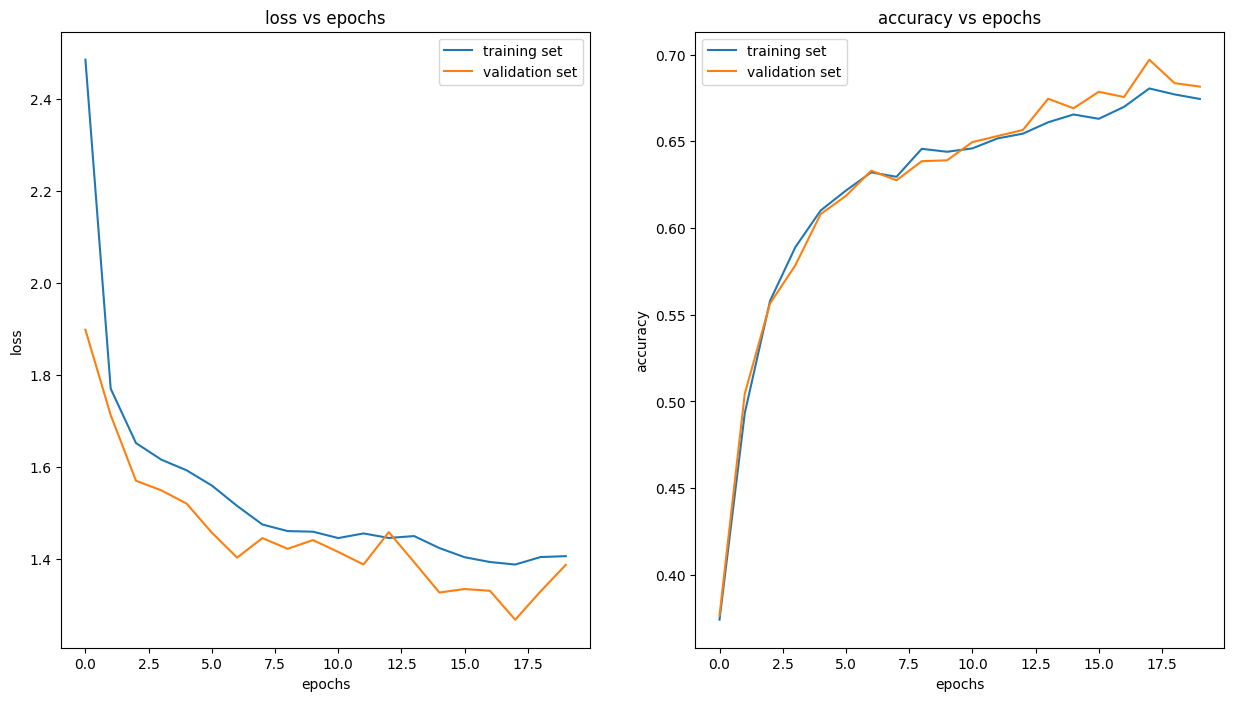

In [32]:
# neural network for tanh activation function
nn= MLP()
nn.add(fully_connected_layer(16, 40))
nn.add(activation_layer(act_func="tanh"))
#nn.add(activation_layer(activation_tanh, gradient_tanh))
nn.add(fully_connected_layer(40, 26))
nn.add(softmax_layer(26))
nn.use(cross_entropy_loss, grad_cross_entropy_loss)
nn.fit(x_train_arr, y_train_arr, x_valid_arr, y_valid_arr,  epochs=20, learning_rate=0.001, optimizer="adam")
nn.plot()

y_test_pred = np.array(nn.predict(x_test_arr))
y_test_pred = onehot.inverse_transform(y_test_pred)
y_test_true = onehot.inverse_transform(y_test_arr)
print("Accuracy on test set: ", accuracy_score(y_test_pred,y_test_true))

# for relu activation

epoch- 0/20, loss- 2.800645124648064
epoch- 1/20, loss- 1.9573487388589554
epoch- 2/20, loss- 1.6613207721119385
epoch- 3/20, loss- 1.5006014524197293
epoch- 4/20, loss- 1.4020208037404536
epoch- 5/20, loss- 1.3406659913878556
epoch- 6/20, loss- 1.3021977272718872
epoch- 7/20, loss- 1.2718083890888852
epoch- 8/20, loss- 1.2511874165531032
epoch- 9/20, loss- 1.2357377567541372
epoch- 10/20, loss- 1.2255004479148295
epoch- 11/20, loss- 1.2193503086813335
epoch- 12/20, loss- 1.2158565102584344
epoch- 13/20, loss- 1.2139335391813948
epoch- 14/20, loss- 1.2149939346970002
epoch- 15/20, loss- 1.2173295336687786
epoch- 16/20, loss- 1.220953492865633
epoch- 17/20, loss- 1.225315314281561
epoch- 18/20, loss- 1.2328576003504141
epoch- 19/20, loss- 1.2439312460238066
Accuracy on test set:  0.635


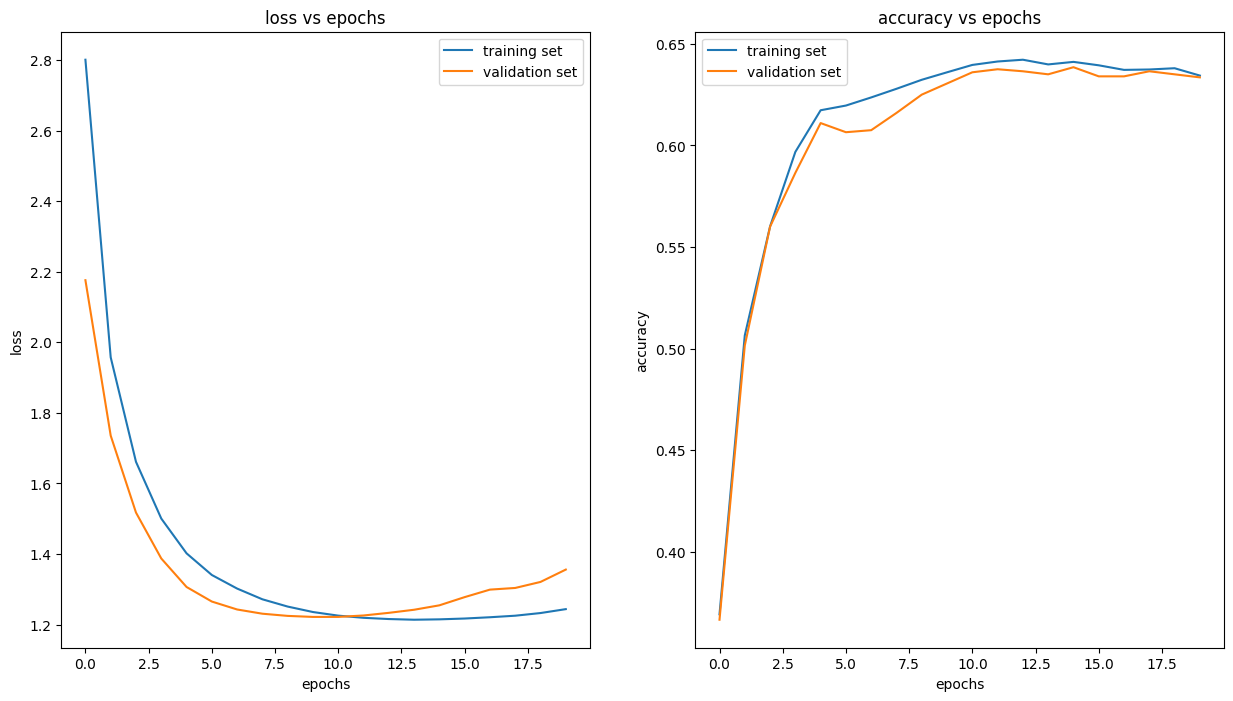

In [37]:
# neural network for relu activation function
nn= MLP()
nn.add(fully_connected_layer(16, 40))
nn.add(activation_layer(act_func="relu"))
#nn.add(activation_layer(activation_relu, gradient_relu))
nn.add(fully_connected_layer(40, 26))
nn.add(softmax_layer(26))
nn.use(cross_entropy_loss, grad_cross_entropy_loss)
nn.fit(x_train_arr, y_train_arr, x_valid_arr, y_valid_arr,  epochs=20, learning_rate=1e-4, optimizer="adam")
nn.plot()

y_test_pred = np.array(nn.predict(x_test_arr))
y_test_pred = onehot.inverse_transform(y_test_pred)
y_test_true = onehot.inverse_transform(y_test_arr)
print("Accuracy on test set: ", accuracy_score(y_test_pred,y_test_true))

# for different learning rates on tanh activation

training for learning rate 1e-05
---------------------------------
epoch- 0/20, loss- 3.6507989615111143
epoch- 1/20, loss- 3.3902791159594217
epoch- 2/20, loss- 3.2832223832479825
epoch- 3/20, loss- 3.2134975221111484
epoch- 4/20, loss- 3.163537802493247
epoch- 5/20, loss- 3.1241895436310485
epoch- 6/20, loss- 3.0905104451033045
epoch- 7/20, loss- 3.060747430640881
epoch- 8/20, loss- 3.0330097263403415
epoch- 9/20, loss- 3.0065955798279407
epoch- 10/20, loss- 2.981069146093323
epoch- 11/20, loss- 2.956338682728828
epoch- 12/20, loss- 2.931674579740753
epoch- 13/20, loss- 2.9061196235062248
epoch- 14/20, loss- 2.878782635976009
epoch- 15/20, loss- 2.8511179212017197
epoch- 16/20, loss- 2.82498457217815
epoch- 17/20, loss- 2.7995995148710726
epoch- 18/20, loss- 2.774438691028938
epoch- 19/20, loss- 2.749230885574704
Accuracy on test set:  0.215


training for learning rate 0.0001
---------------------------------
epoch- 0/20, loss- 3.2320028393054367
epoch- 1/20, loss- 2.901076437340721

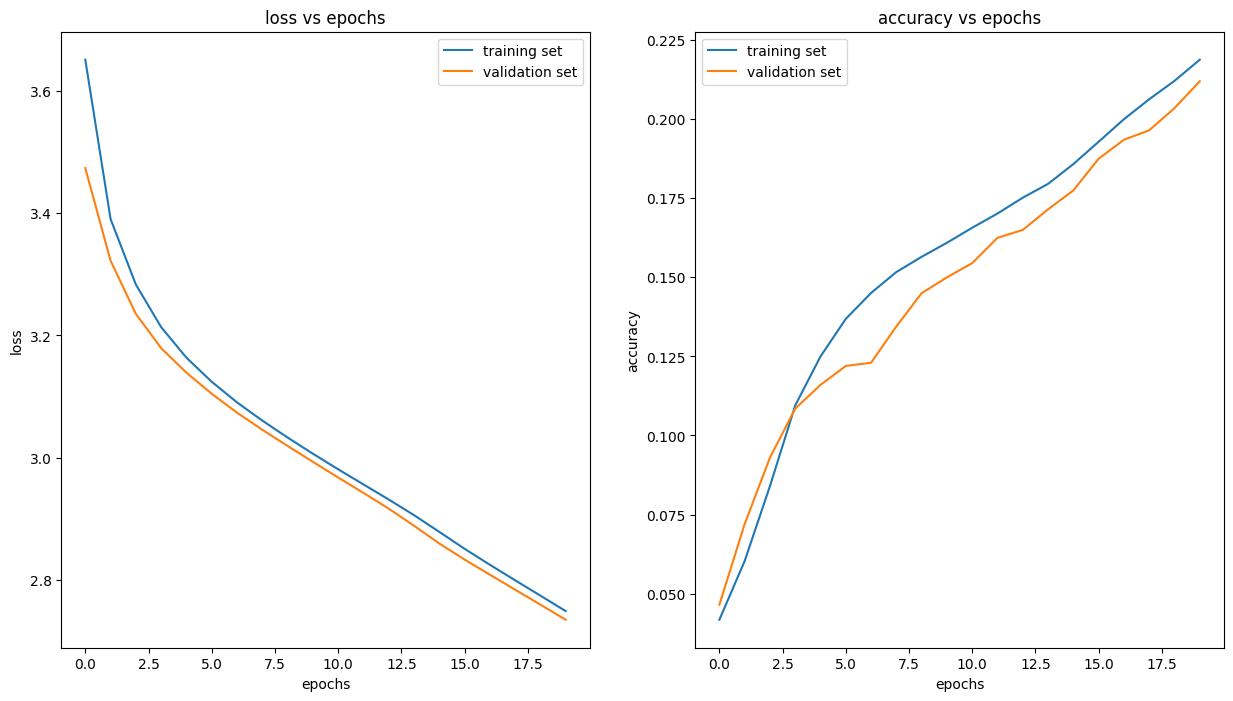

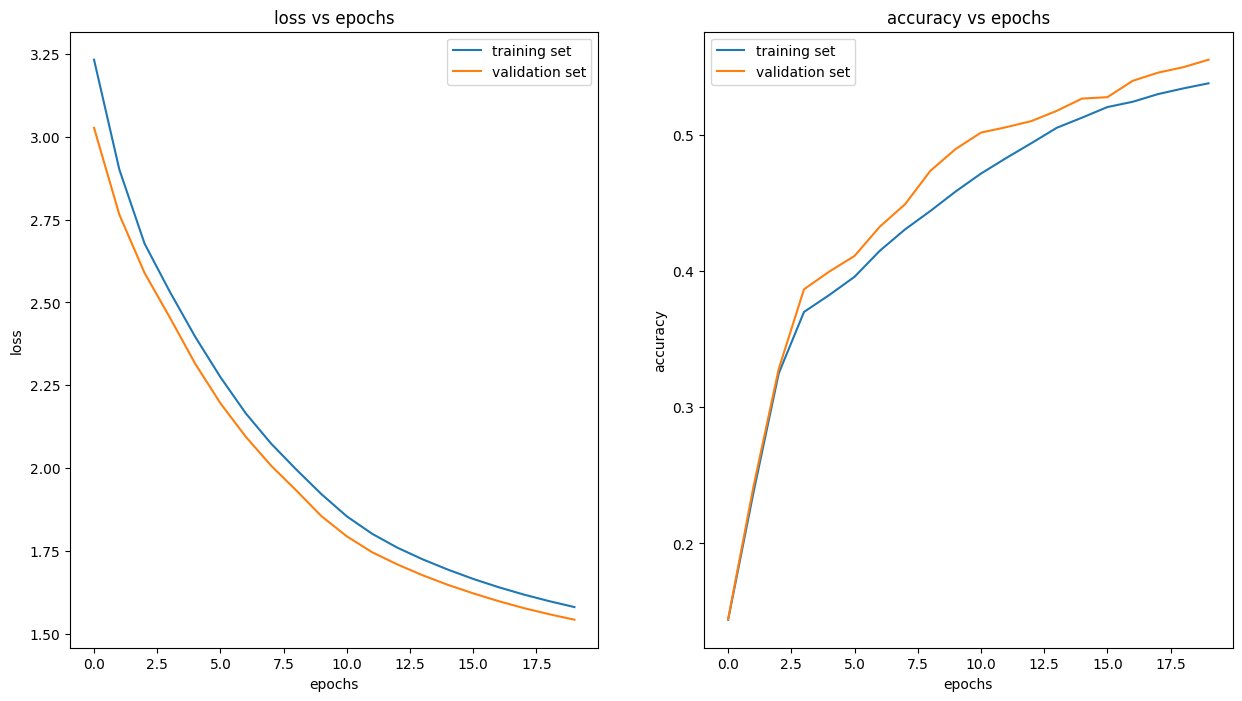

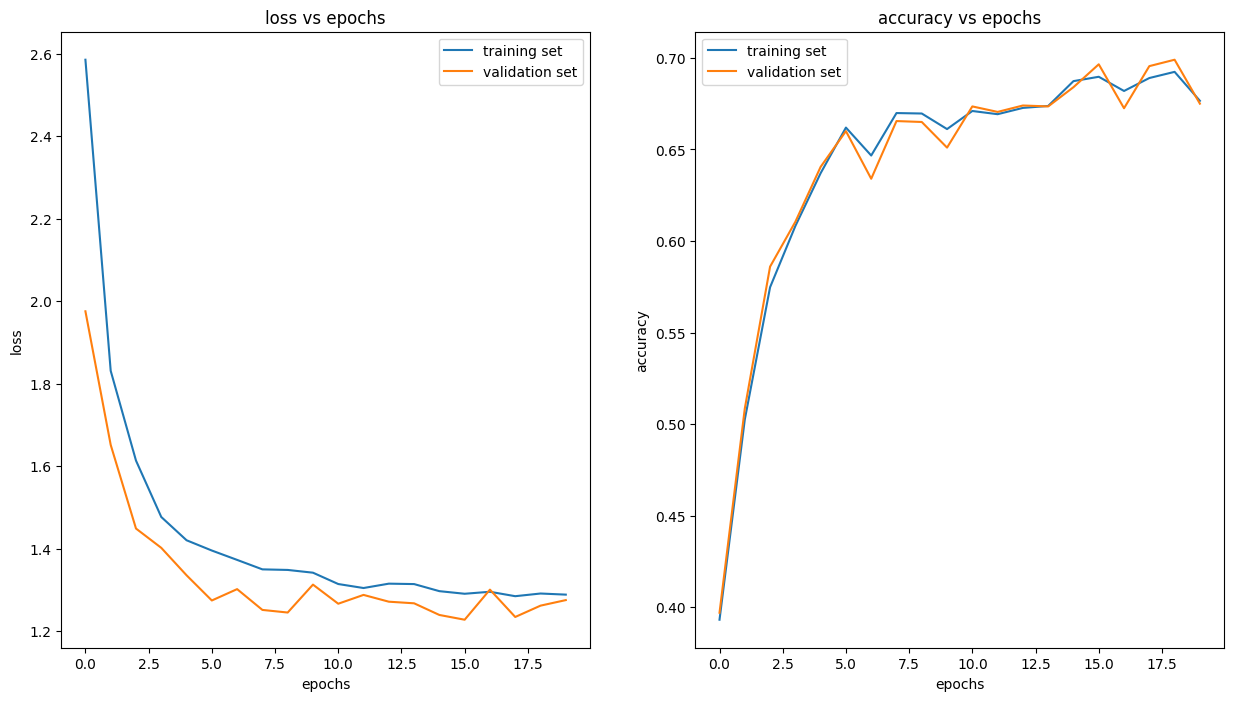

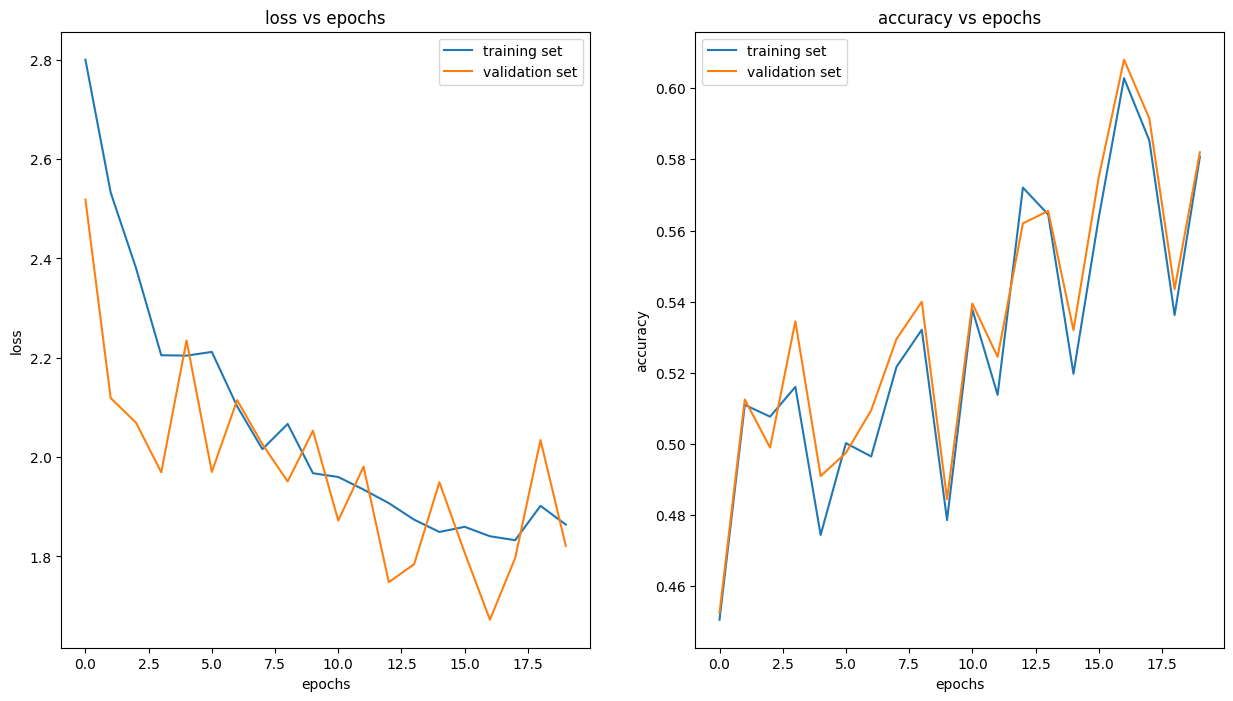

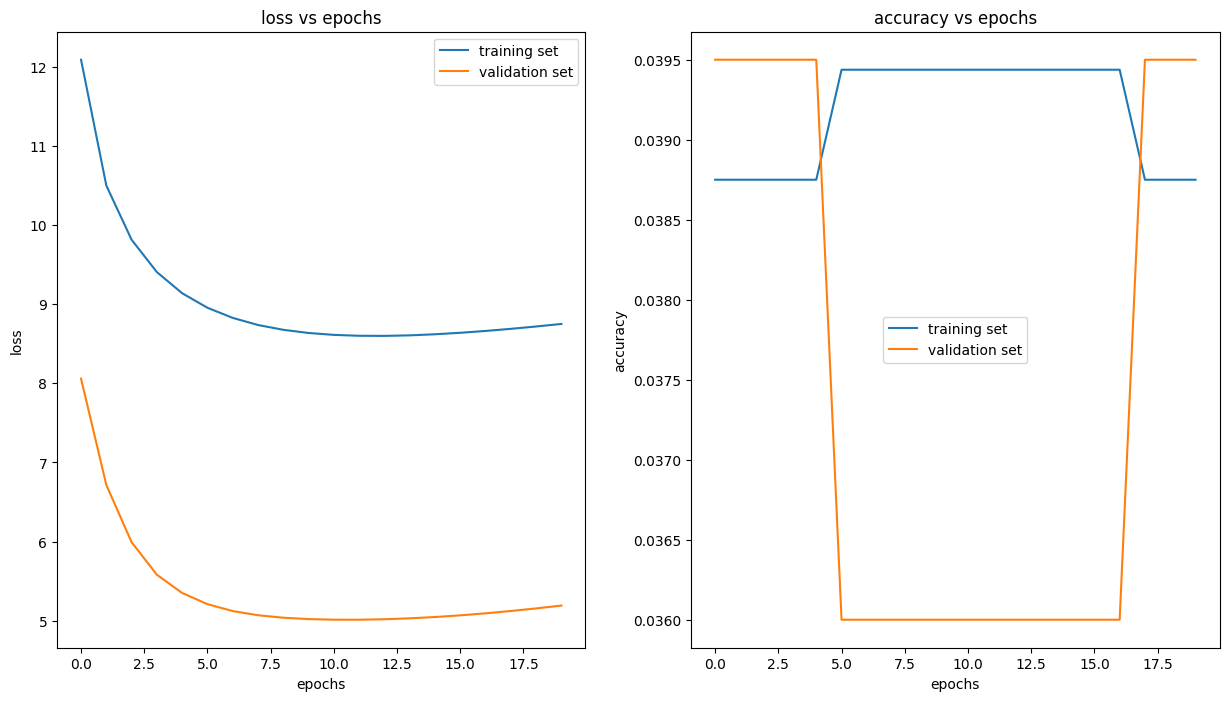

In [34]:
lr=[1e-5,1e-4,0.001,0.01,0.1]
for i in lr:
    print("training for learning rate",i)
    print("---------------------------------")
    nn= MLP()
    nn.add(fully_connected_layer(16, 40))
    nn.add(activation_layer(act_func="tanh"))
    #nn.add(activation_layer(activation_relu, gradient_relu))
    nn.add(fully_connected_layer(40, 26))
    nn.add(softmax_layer(26))
    nn.use(cross_entropy_loss, grad_cross_entropy_loss)
    nn.fit(x_train_arr, y_train_arr, x_valid_arr, y_valid_arr,  epochs=20, learning_rate=i, optimizer="adam")
    nn.plot()
    
    y_test_pred = np.array(nn.predict(x_test_arr))
    y_test_pred = onehot.inverse_transform(y_test_pred)
    y_test_true = onehot.inverse_transform(y_test_arr)
    print("Accuracy on test set: ", accuracy_score(y_test_pred,y_test_true))
    print("\n")

# for different learning rates on relu activation

training for learning rate 1e-05
---------------------------------
epoch- 0/20, loss- 4.664039274644299
epoch- 1/20, loss- 3.540341895821613
epoch- 2/20, loss- 3.256182359364265
epoch- 3/20, loss- 3.0874346285416263
epoch- 4/20, loss- 2.954579316064428
epoch- 5/20, loss- 2.8376539498696904
epoch- 6/20, loss- 2.731186502791021
epoch- 7/20, loss- 2.6336030261319117
epoch- 8/20, loss- 2.543621969032915
epoch- 9/20, loss- 2.460210536802279
epoch- 10/20, loss- 2.383183119098905
epoch- 11/20, loss- 2.3114287125939277
epoch- 12/20, loss- 2.2448279374174707
epoch- 13/20, loss- 2.1833204236561405
epoch- 14/20, loss- 2.126685417249707
epoch- 15/20, loss- 2.074145279843294
epoch- 16/20, loss- 2.025608727264474
epoch- 17/20, loss- 1.9808416425968192
epoch- 18/20, loss- 1.9393367056019195
epoch- 19/20, loss- 1.9008196130734576
Accuracy on test set:  0.475


training for learning rate 0.0001
---------------------------------
epoch- 0/20, loss- 3.1264896716609902
epoch- 1/20, loss- 2.4160236187294015

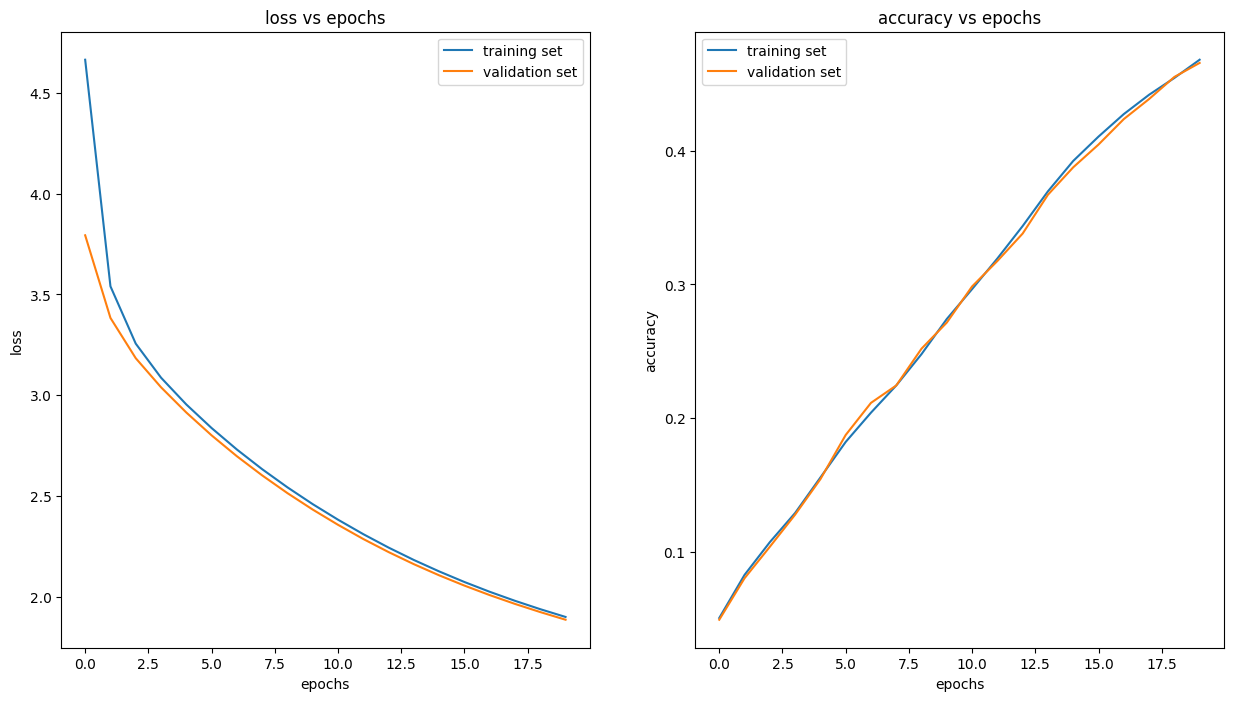

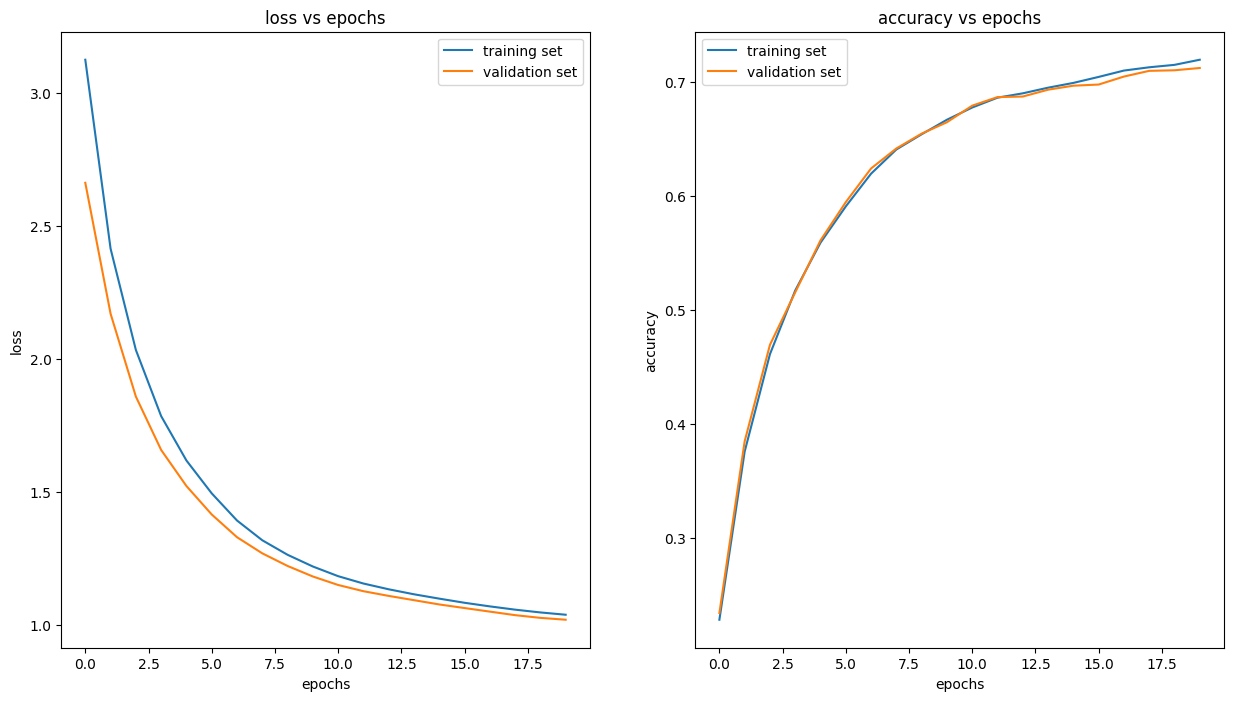

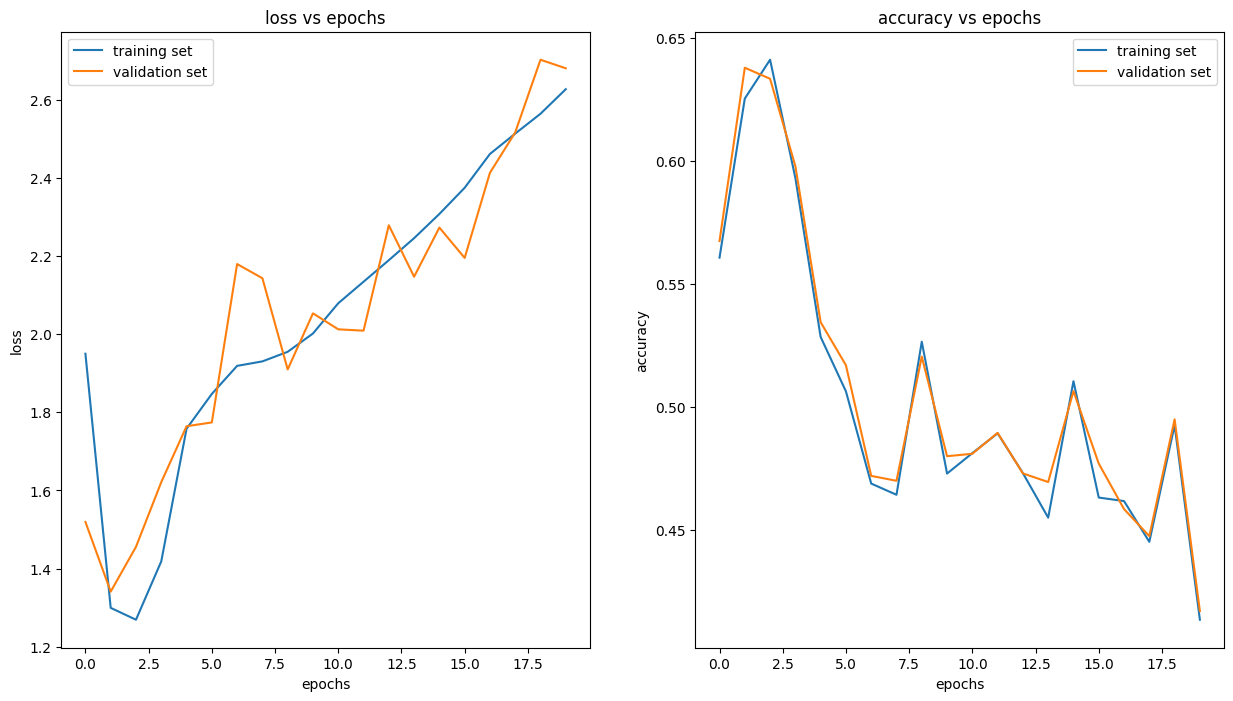

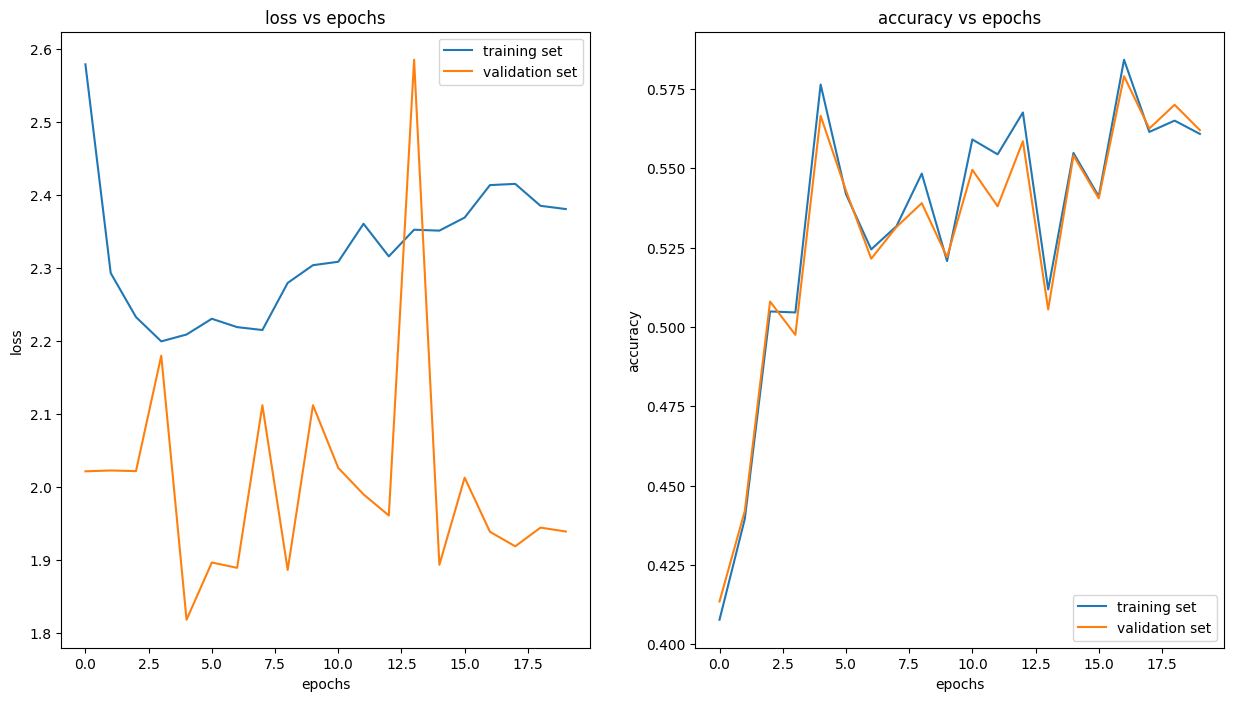

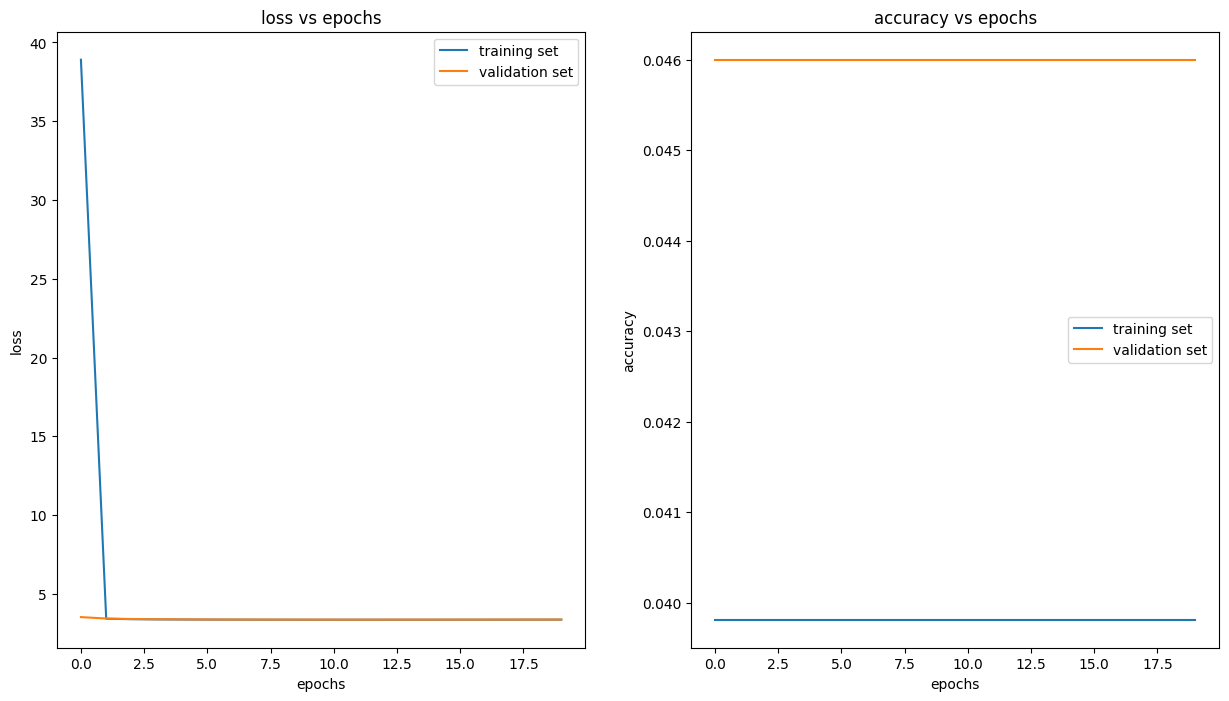

In [35]:
lr=[1e-5,1e-4,0.001,0.01,0.1]
for i in lr:
    print("training for learning rate",i)
    print("---------------------------------")
    nn= MLP()
    nn.add(fully_connected_layer(16, 40))
    nn.add(activation_layer(act_func="relu"))
    #nn.add(activation_layer(activation_relu, gradient_relu))
    nn.add(fully_connected_layer(40, 26))
    nn.add(softmax_layer(26))
    nn.use(cross_entropy_loss, grad_cross_entropy_loss)
    nn.fit(x_train_arr, y_train_arr, x_valid_arr, y_valid_arr,  epochs=20, learning_rate=i, optimizer="adam")
    nn.plot()
    
    y_test_pred = np.array(nn.predict(x_test_arr))
    y_test_pred = onehot.inverse_transform(y_test_pred)
    y_test_true = onehot.inverse_transform(y_test_arr)
    print("Accuracy on test set: ", accuracy_score(y_test_pred,y_test_true))
    print("\n")

# for different epochs on tanh activation

epoch- 0/100, loss- 2.5083383894457993
epoch- 1/100, loss- 1.862494219274102
epoch- 2/100, loss- 1.859269353058428
epoch- 3/100, loss- 1.7897892848493262
epoch- 4/100, loss- 1.6670168525369806
epoch- 5/100, loss- 1.5671354038545084
epoch- 6/100, loss- 1.504174246043134
epoch- 7/100, loss- 1.4618135603814795
epoch- 8/100, loss- 1.434236305329016
epoch- 9/100, loss- 1.4185731151648417
epoch- 10/100, loss- 1.4088692563745076
epoch- 11/100, loss- 1.4041577427653387
epoch- 12/100, loss- 1.3947059373933794
epoch- 13/100, loss- 1.3630910813052266
epoch- 14/100, loss- 1.3534617727820148
epoch- 15/100, loss- 1.3342925821242186
epoch- 16/100, loss- 1.3260759747736384
epoch- 17/100, loss- 1.3207539992364896
epoch- 18/100, loss- 1.3125294417135311
epoch- 19/100, loss- 1.312032116817627
epoch- 20/100, loss- 1.3214866073243292
epoch- 21/100, loss- 1.315682243804574
epoch- 22/100, loss- 1.3145655307803583
epoch- 23/100, loss- 1.3192780988413066
epoch- 24/100, loss- 1.3299791663405724
epoch- 25/100, l

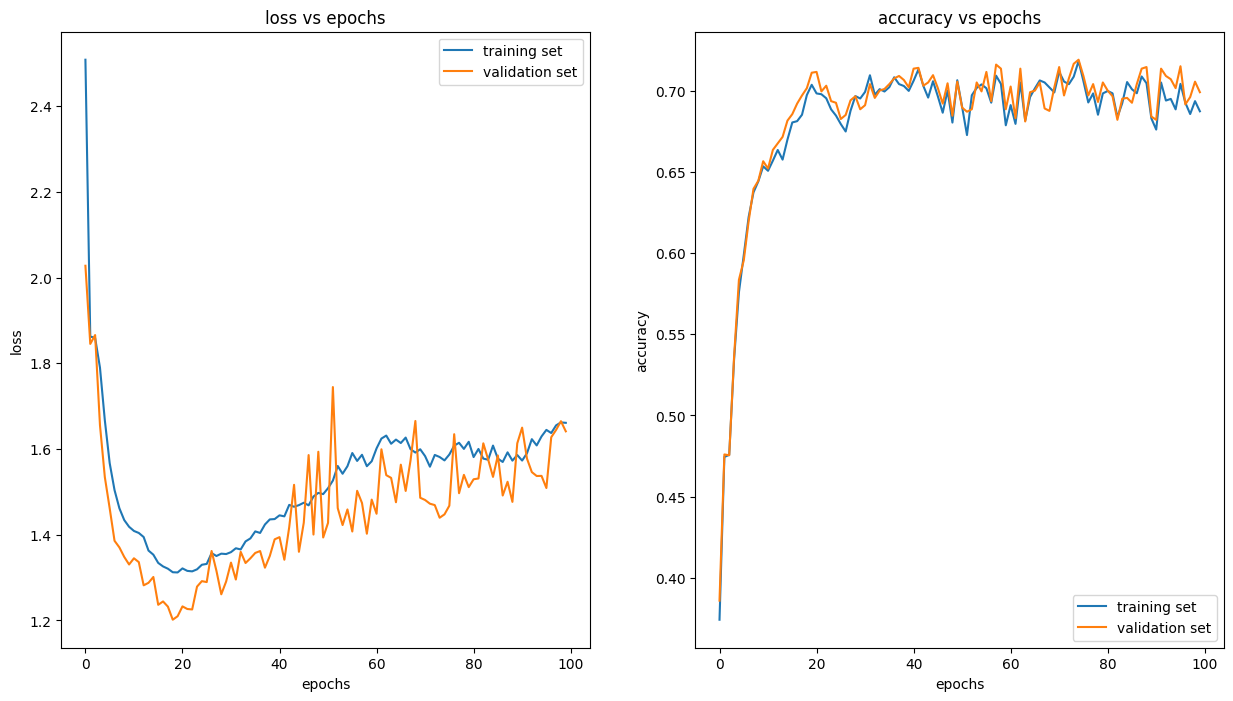

In [38]:
# lets run it for 100 epochs so that we can observe what is happening for all the epochs between 20 and 100
# neural network for tanh activation function
nn= MLP()
nn.add(fully_connected_layer(16, 40))
nn.add(activation_layer(act_func="tanh"))
#nn.add(activation_layer(activation_tanh, gradient_tanh))
nn.add(fully_connected_layer(40, 26))
nn.add(softmax_layer(26))
nn.use(cross_entropy_loss, grad_cross_entropy_loss)
nn.fit(x_train_arr, y_train_arr, x_valid_arr, y_valid_arr,  epochs=100, learning_rate=0.001, optimizer="adam")
nn.plot()

y_test_pred = np.array(nn.predict(x_test_arr))
y_test_pred = onehot.inverse_transform(y_test_pred)
y_test_true = onehot.inverse_transform(y_test_arr)
print("Accuracy on test set: ", accuracy_score(y_test_pred,y_test_true))

# for different epochs on relu activation

epoch- 0/100, loss- 2.9884792852037654
epoch- 1/100, loss- 2.113862652356504
epoch- 2/100, loss- 1.759463925354568
epoch- 3/100, loss- 1.5623163976989092
epoch- 4/100, loss- 1.441973814711572
epoch- 5/100, loss- 1.3627454071201852
epoch- 6/100, loss- 1.3048068553075987
epoch- 7/100, loss- 1.2620756334812169
epoch- 8/100, loss- 1.2307569469413993
epoch- 9/100, loss- 1.2053166638904065
epoch- 10/100, loss- 1.1829633575528484
epoch- 11/100, loss- 1.1636753929978416
epoch- 12/100, loss- 1.1457332535655758
epoch- 13/100, loss- 1.1271035167026071
epoch- 14/100, loss- 1.1085508052583206
epoch- 15/100, loss- 1.0906723336778799
epoch- 16/100, loss- 1.0767276665691907
epoch- 17/100, loss- 1.070428385252438
epoch- 18/100, loss- 1.0703047058086363
epoch- 19/100, loss- 1.0737989161247021
epoch- 20/100, loss- 1.0818209878601366
epoch- 21/100, loss- 1.1012466393637723
epoch- 22/100, loss- 1.1325516638786413
epoch- 23/100, loss- 1.1778724890545886
epoch- 24/100, loss- 1.2256920166974854
epoch- 25/100,

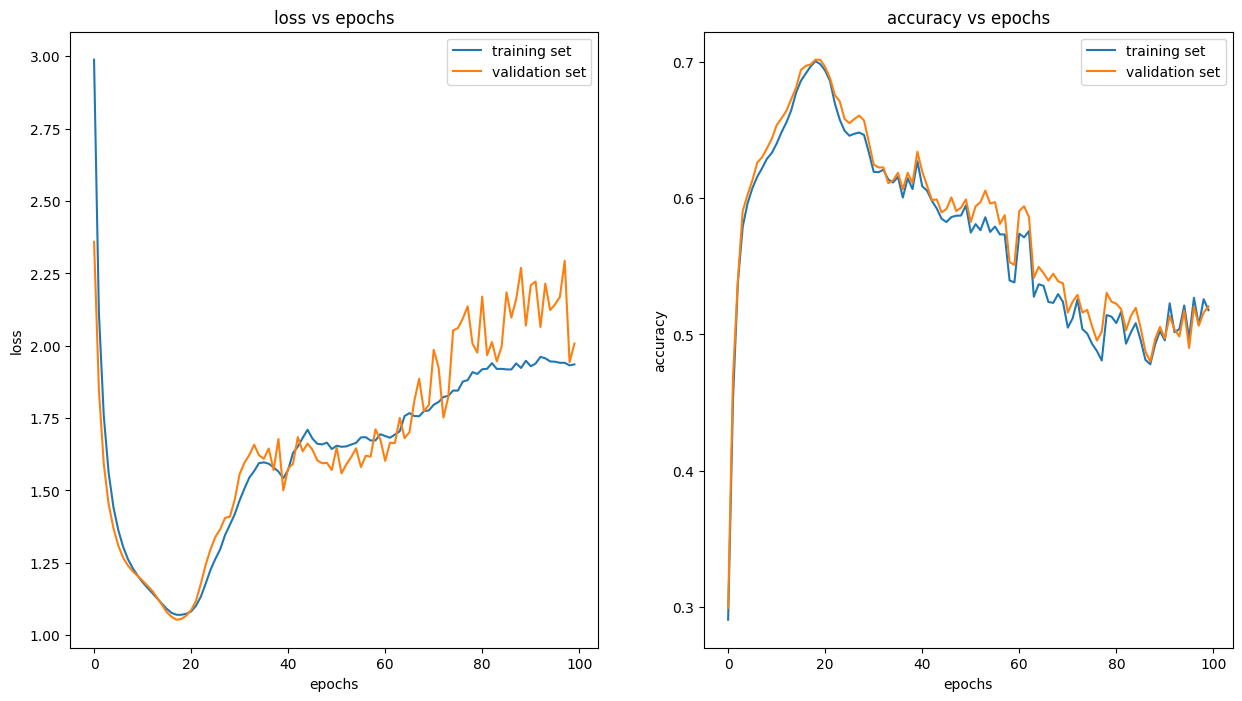

In [39]:
# lets run it for 100 epochs so that we can observe what is happening for all the epochs between 20 and 100
# neural network for tanh activation function
nn= MLP()
nn.add(fully_connected_layer(16, 40))
nn.add(activation_layer(act_func="relu"))
#nn.add(activation_layer(activation_tanh, gradient_tanh))
nn.add(fully_connected_layer(40, 26))
nn.add(softmax_layer(26))
nn.use(cross_entropy_loss, grad_cross_entropy_loss)
nn.fit(x_train_arr, y_train_arr, x_valid_arr, y_valid_arr,  epochs=100, learning_rate=1e-4, optimizer="adam")
nn.plot()

y_test_pred = np.array(nn.predict(x_test_arr))
y_test_pred = onehot.inverse_transform(y_test_pred)
y_test_true = onehot.inverse_transform(y_test_arr)
print("Accuracy on test set: ", accuracy_score(y_test_pred,y_test_true))

# finally we prefer tanh activation with learning rate 0.001 or 1e-3, number of epochs 100 and get test accuracy of 68.3%

In [40]:
# code ended for Q.1.